In [1]:
import numpy as np
import pydicom as dicom
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

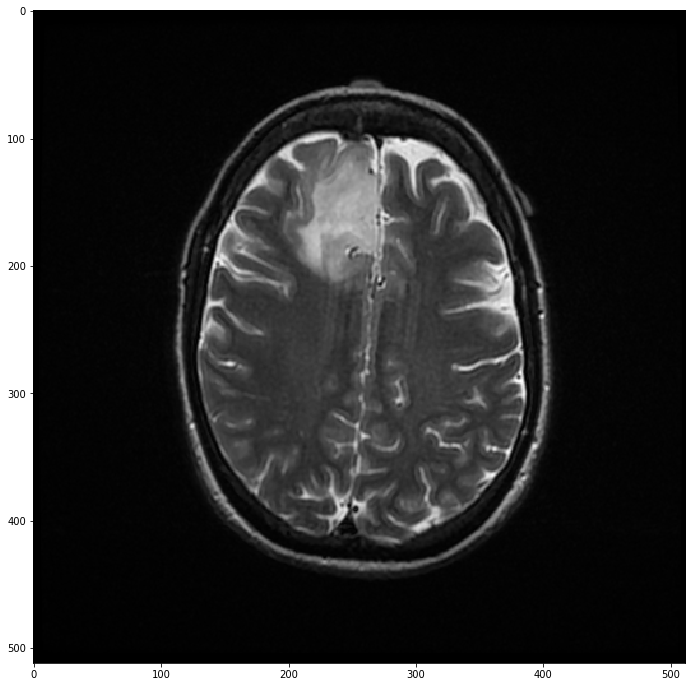

In [7]:
ds = dicom.read_file('brain.dcm')
pixels = ds.pixel_array
plt.figure(figsize=(12, 12))
plt.imshow(pixels, 'gray')
plt.show()

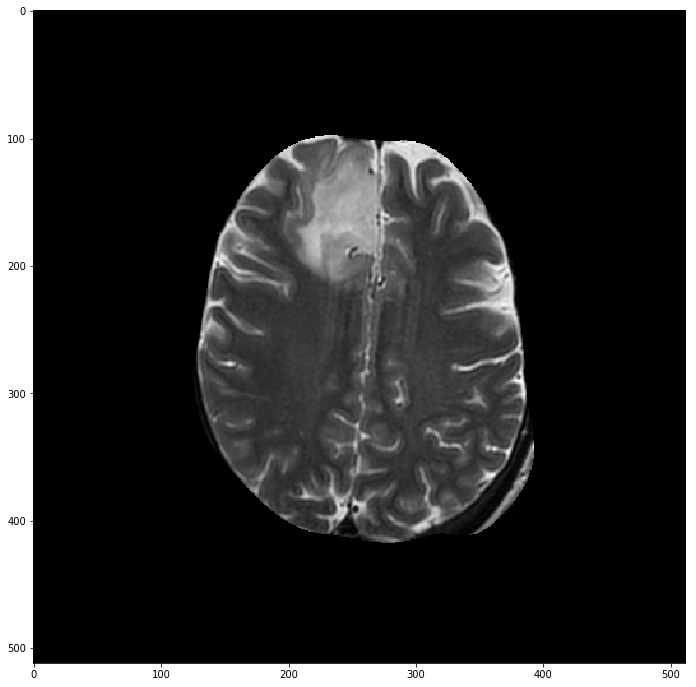

In [16]:
from dipy.segment.mask import median_otsu
median_radius = 10
num_pass = 4
brain, mask = median_otsu(ds.pixel_array, median_radius=median_radius, numpass=num_pass)
plt.figure(figsize=(12, 12))
plt.imshow(brain, 'gray')
plt.show()

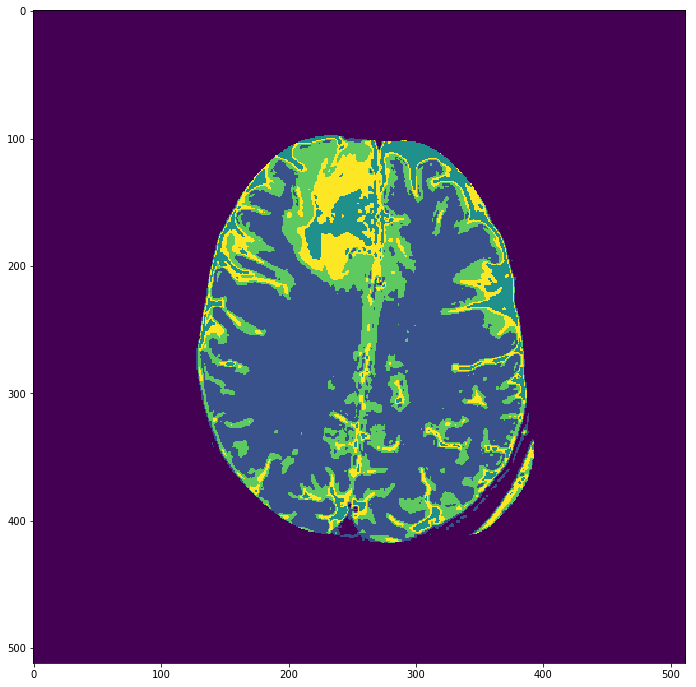

In [22]:
from sklearn.cluster import KMeans
orig_shape = brain.shape
X = brain.reshape((-1, 1))
max_val = max(X)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
clustered = kmeans.labels_
clustered = clustered.reshape(orig_shape)
plt.figure(figsize=(12, 12))
plt.imshow(clustered)
plt.show()

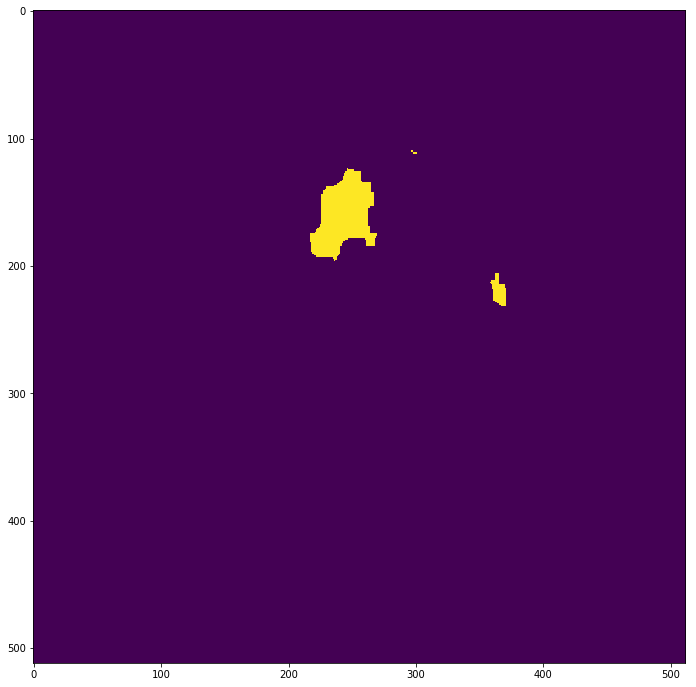

2204


In [44]:
ret, thresh1 = cv.threshold(brain, 1000, max_val, cv.THRESH_BINARY)
kernel = np.ones((5, 5),np.uint8)
erosion = cv.erode(thresh1, kernel, iterations = 3)
plt.figure(figsize=(12, 12))
plt.imshow(erosion)
plt.show()
reshaped = thresh1.reshape((-1))
print(max(reshaped))

#### 